<a href="https://colab.research.google.com/github/saeidfarahan/Machine-Learning/blob/main/K_NN_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ویژگی‌ها: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
کلاس‌ها: ['setosa' 'versicolor' 'virginica']
ابعاد کل داده: (150, 4)

بهترین مقدار k: 5
بیشترین دقت اعتبارسنجی متقابل: 0.967


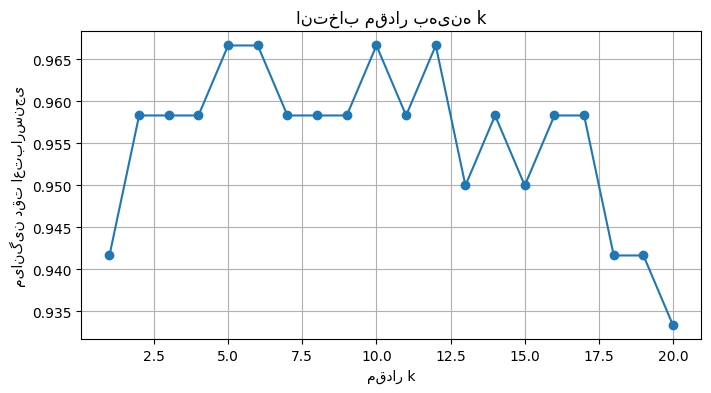


دقت مدل بر روی داده‌های آزمون: 0.933

ماتریس درهم‌ریختگی:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

گزارش طبقه‌بندی:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



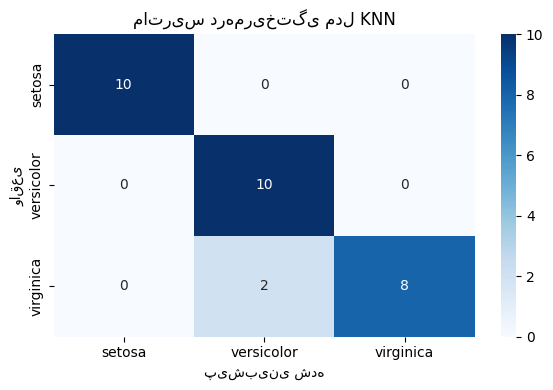

In [1]:
# اجرای کامل الگوریتم KNN بر روی مجموعه داده Iris

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 1. بارگذاری و آماده‌سازی داده Iris
iris = load_iris()
X = iris.data
y = iris.target

# نمایش اطلاعات اولیه
print("ویژگی‌ها:", iris.feature_names)
print("کلاس‌ها:", iris.target_names)
print("ابعاد کل داده:", X.shape)

# تقسیم داده‌ها به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# استانداردسازی ویژگی‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. انتخاب مدل KNN و تعیین مقدار k بهینه با Cross-Validation
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print("\nبهترین مقدار k:", best_k)
print("بیشترین دقت اعتبارسنجی متقابل: %.3f" % max(cv_scores))

# نمودار دقت بر حسب k
plt.figure(figsize=(8, 4))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('مقدار k')
plt.ylabel('میانگین دقت اعتبارسنجی')
plt.title('انتخاب مقدار بهینه k')
plt.grid(True)
plt.show()

# 3. آموزش مدل KNN و پیش‌بینی برچسب‌ها
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred = knn_final.predict(X_test_scaled)

# دقت مدل
test_accuracy = (y_pred == y_test).mean()
print("\nدقت مدل بر روی داده‌های آزمون: %.3f" % test_accuracy)

# 4. ارزیابی مدل با ماتریس درهم‌ریختگی و معیار دقت
cm = confusion_matrix(y_test, y_pred)
print("\nماتریس درهم‌ریختگی:")
print(cm)

print("\nگزارش طبقه‌بندی:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# نمودار ماتریس درهم‌ریختگی
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('پیش‌بینی شده')
plt.ylabel('واقعی')
plt.title('ماتریس درهم‌ریختگی مدل KNN')
plt.tight_layout()
plt.show()
